decouverte des donnees

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# collecter les noms des fichiers(datasets)
files = [file for file in os.listdir(r'C:\Users\hamza\OneDrive\Documents\data-sales-main') ]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [3]:
path= r'C:\Users\hamza\OneDrive\Documents\data-sales-main'
#cree une base de donnes vide
all_data= pd.DataFrame()

for file in files:
    current_data=pd.read_csv(path+'/'+file)
    all_data=pd.concat([all_data, current_data])

print(all_data)

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

cree un fichier concate tout les files

In [4]:
all_data.to_csv(path+'all_data.csv', index=False)

In [8]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

quel esl le mois durant lequel nous avons realise le meuilleur chiffre d'affaire?

In [21]:
def month(x):
    try:
        return x.split('/')[0]  # Supposant que le format de date soit MM/DD/YYYY
    except AttributeError:
        return None  # Retourne None si la valeur n'est pas une chaîne de caractères

In [22]:
all_data['Month']=all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [29]:
all_data['Month'].unique()

array(['04', None, '05', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [30]:
all_data=all_data[all_data['Month']!='Order Date']

In [31]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [44]:
all_data['Month'] = all_data['Month'].fillna('0')
all_data['Month'].unique()


array(['04', '0', '05', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

In [46]:
all_data['Month']=all_data['Month'].astype(int)
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [55]:
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(float)
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [56]:
all_data['chiffre']=all_data['Quantity Ordered']*all_data['Price Each']
print(all_data)

      Order ID                     Product  Quantity Ordered  Price Each  \
0       176558        USB-C Charging Cable               2.0       11.95   
1          NaN                         NaN               NaN         NaN   
2       176559  Bose SoundSport Headphones               1.0       99.99   
3       176560                Google Phone               1.0      600.00   
4       176560            Wired Headphones               1.0       11.99   
...        ...                         ...               ...         ...   
11681   259353      AAA Batteries (4-pack)               3.0        2.99   
11682   259354                      iPhone               1.0      700.00   
11683   259355                      iPhone               1.0      700.00   
11684   259356      34in Ultrawide Monitor               1.0      379.99   
11685   259357        USB-C Charging Cable               1.0       11.95   

           Order Date                         Purchase Address  Month  chiffre  
0     

In [57]:
all_data.groupby('Month')['chiffre'].sum()

Month
0           0.00
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: chiffre, dtype: float64

In [63]:
all_data['Month'].unique()

array([ 4,  0,  5,  8,  9, 12,  1,  2,  3,  7,  6, 11, 10])

<function matplotlib.pyplot.show(close=None, block=None)>

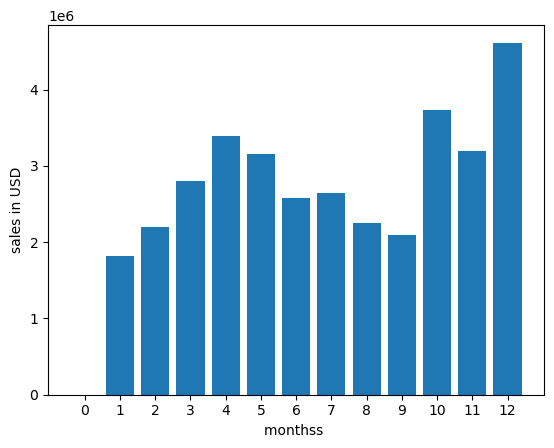

In [65]:
months=range(0,13)
plt.bar(months, all_data.groupby('Month')['chiffre'].sum())
plt.xticks(months)
plt.ylabel('sales in USD')
plt.xlabel('monthss ')
plt.show

dans quelle ville nous avons ent=registre un maximun des commande

In [66]:
def ville(x):
    return x.split(',')[1]

In [70]:
# Supprime les lignes où la colonne 'Purchase Address' contient des NaN
all_data = all_data.dropna(subset=['Purchase Address'])


In [71]:
all_data['City']=all_data['Purchase Address'].apply(ville)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,chiffre,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [74]:
all_data.groupby('City')['City'].count()

City
Atlanta          14881
Austin            9905
Boston           19934
Dallas           14820
Los Angeles      29605
New York City    24876
Portland         12465
San Francisco    44732
Seattle          14732
Name: City, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

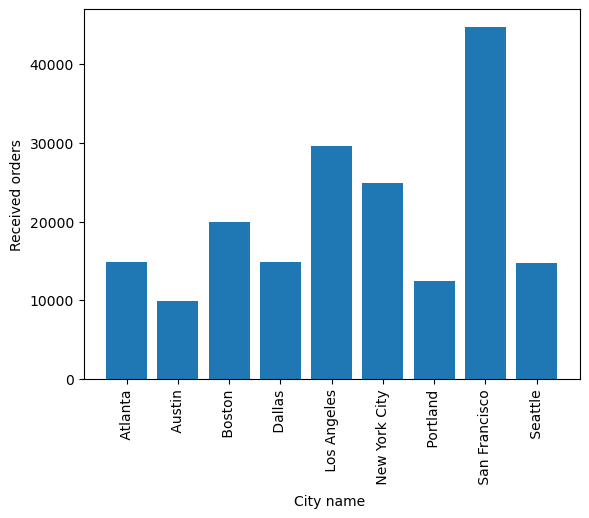

In [76]:

plt.bar(all_data.groupby('City')['City'].count().index, all_data.groupby('City')['City'].count().values)
plt.xticks(rotation='vertical')
plt.ylabel('Received orders')
plt.xlabel('City name ')
plt.show

en quelle moment doit on faire une compagne publicitaure pour avoir plus de ventes ?

In [80]:
all_data['Hours']=pd.to_datetime(all_data['Order Date']).dt.hour

C:\Users\hamza\AppData\Local\Temp\ipykernel_22668\234455153.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hours']=pd.to_datetime(all_data['Order Date']).dt.hour


In [81]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,chiffre,City,Hours
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [84]:
keys=[]
hours=[]
for key, hour in all_data.groupby('Hours'):
    keys.append(key)
    hours.append(len(hour))

hours

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

Text(0, 0.5, 'nombre des commandes')

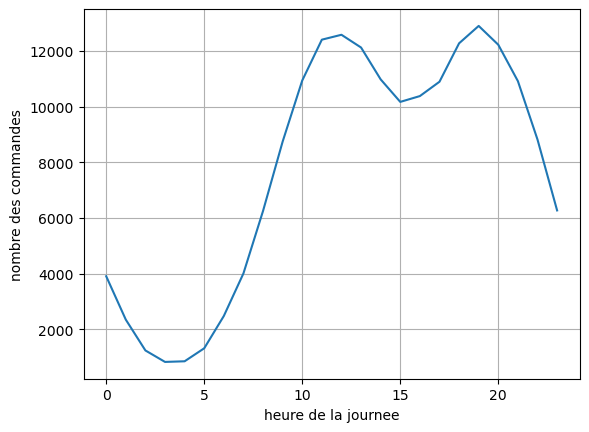

In [86]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('heure de la journee')
plt.ylabel('nombre des commandes')

quel produit se vend le plus?

<Axes: xlabel='Product'>

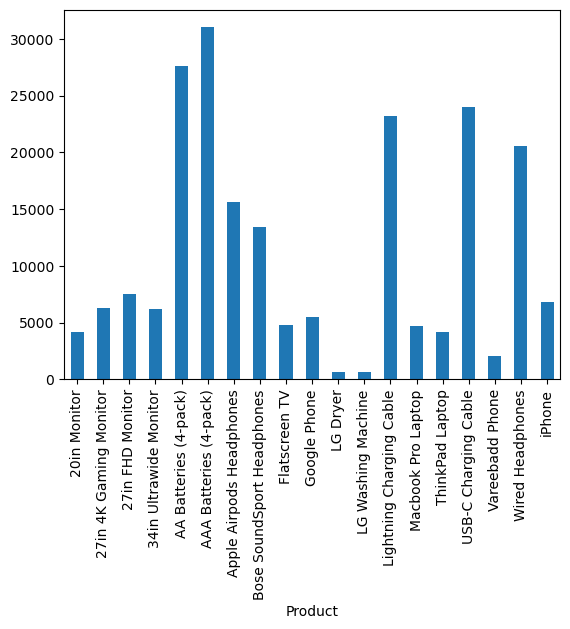

In [90]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [91]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [92]:
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
prices=all_data.groupby('Product')['Price Each'].mean()

C:\Users\hamza\AppData\Local\Temp\ipykernel_22668\3849606821.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation='vertical',size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 4000x2400 with 0 Axes>

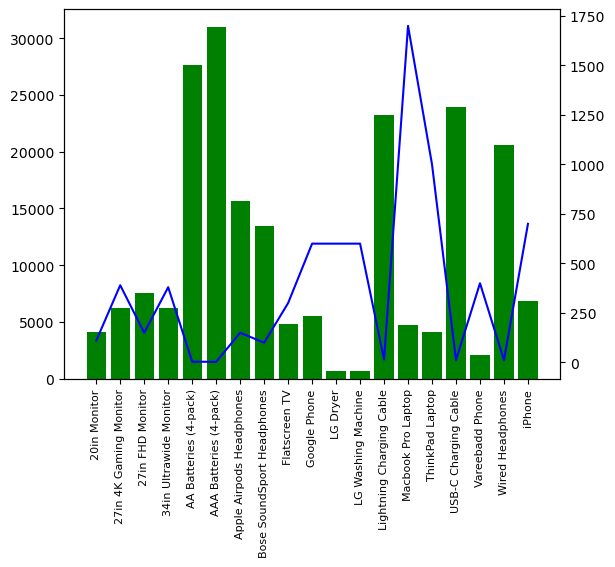

In [94]:
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity, color='g')
ax2.plot(products,prices,'b-')
ax1.set_xticklabels(products,rotation='vertical',size=8)

quelles sont les combinaisons des produits qui se vendent le plus ?

In [103]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,chiffre,City,Hours
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


In [116]:
df=all_data[all_data.duplicated(subset=['Order ID'], keep=False)]

In [118]:
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

C:\Users\hamza\AppData\Local\Temp\ipykernel_22668\3862546878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [121]:
df2 =df.drop_duplicates(subset=['Order ID'])

<Axes: ylabel='count'>

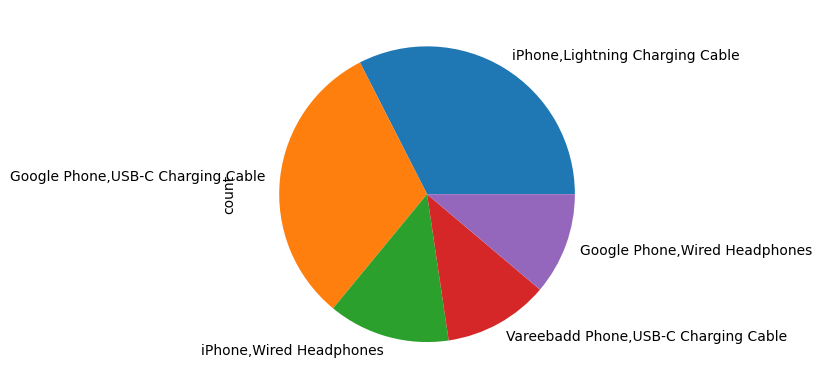

In [124]:
df2['Grouped'].value_counts()[0:5].plot.pie()